In [1]:
!pip install statsmodels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
df=pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\datascience\\Toyoto_Corrola.csv")
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [4]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


# data preprocessing checking for null values

In [5]:
df.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [7]:
df.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# visualization of data

# correaltion

In [10]:
correlation=df.select_dtypes(include='number').corr() # correlation is used to describe the relation between each variable
correlation

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


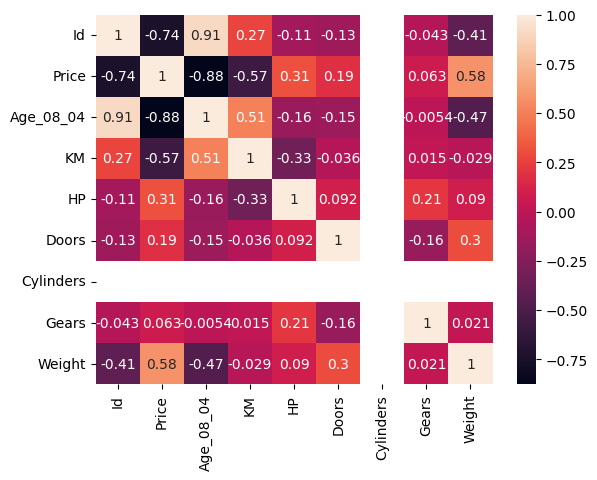

In [11]:
sns.heatmap(correlation,annot=True) # heat map is used to visualize the correlation
plt.show() 

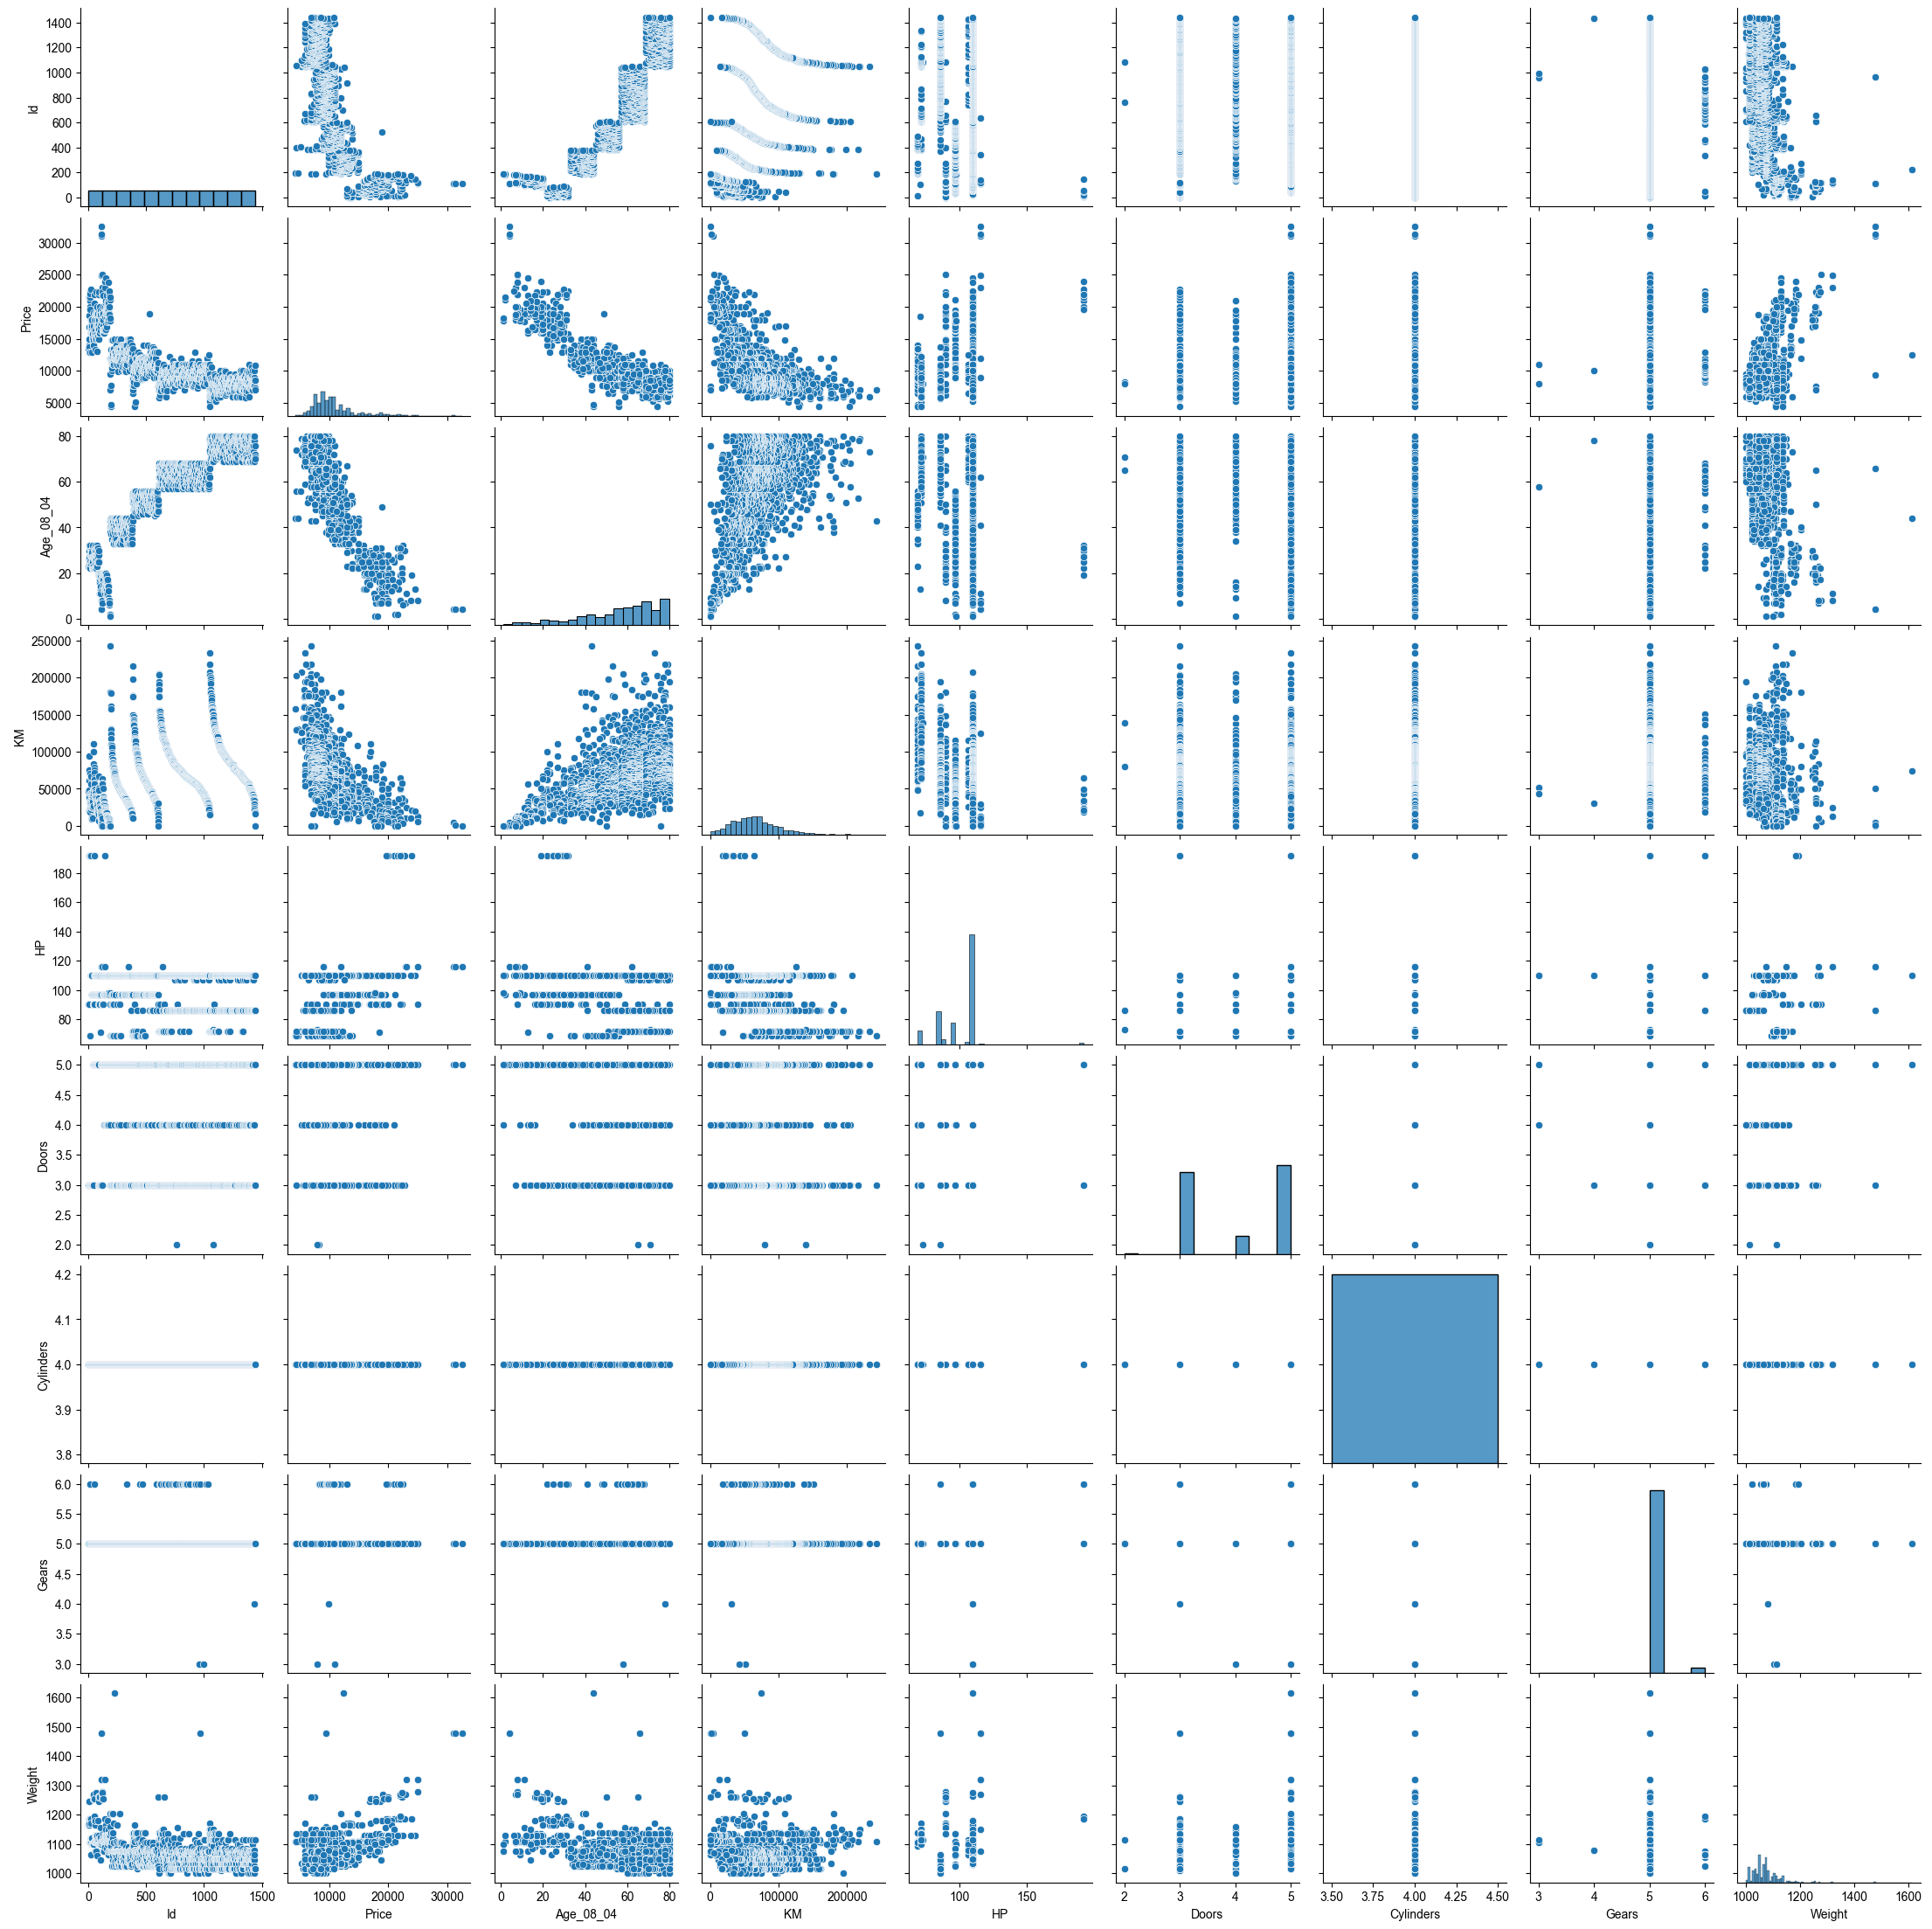

In [12]:
sns.pairplot(df)
sns.set_style(style='darkgrid')
plt.show()

# Splitting the Dataset into Training and Testing Sets

# model-1

In [17]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,3:] # independent variables
y=df.iloc[:,2] # dependent variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f'x_train:{x_train}')
print('-'*30)
print(f'y_train:{y_train}')
print('-'*30)
print(f'x_test:{x_test}')
print('-'*30)
print(f'y_test:{y_test}')

x_train:      Age_08_04      KM   HP  Doors  Cylinders  Gears  Weight
899          62   59295   86      5          4      5    1035
881          68   61568  110      4          4      5    1035
310          40   38653  110      5          4      5    1080
1145         75  101855  110      5          4      5    1070
31           22   35199   97      3          4      5    1100
...         ...     ...  ...    ...        ...    ...     ...
1095         76  125778  110      3          4      5    1050
1130         73  107108  110      3          4      5    1050
1294         80   71740  110      5          4      5    1070
860          63   64690   86      3          4      5    1020
1126         80  110000  110      4          4      5    1035

[1148 rows x 7 columns]
------------------------------
y_train:899      9500
881      9795
310     12950
1145     6450
31      15750
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1148, dty

In [18]:
train_data=pd.concat([x_train,y_train],axis=1)
train_data

,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight,Price
899,62,59295,86,5,4,5,1035,9500
881,68,61568,110,4,4,5,1035,9795
310,40,38653,110,5,4,5,1080,12950
1145,75,101855,110,5,4,5,1070,6450
31,22,35199,97,3,4,5,1100,15750
...,...,...,...,...,...,...,...,...
1095,76,125778,110,3,4,5,1050,6900
1130,73,107108,110,3,4,5,1050,7950
1294,80,71740,110,5,4,5,1070,6950
860,63,64690,86,3,4,5,1020,9750


# claculating the vif for  each predictors "

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
predictors=x_train
vif_values=[]
for i in range(predictors.shape[1]): # predictors.shape[1] will go iterraion on each column
    vif=variance_inflation_factor(predictors.values,i)
    vif_values.append(vif) # appending vif values into list so that we can convert into a dataframe
print(vif_values)

    

[1.9055351424579932, 1.6512302828979102, 1.206115389700901, 1.1330061509822218, 1355.0912547734426, 1.0912074187873433, 1.514538075327085]


# converting vif into dataframe

In [32]:
vif_values_data=pd.DataFrame() # Taking empty dataframe
vif_values_data['vif_values']=pd.DataFrame(vif_values) # converting into dataframe
vif_values_data['X_features']=pd.DataFrame(predictors.columns)
vif_values_data

,vif_values,X_features
0,1.905535,Age_08_04
1,1.651230,KM
2,1.206115,HP
3,1.133006,Doors
4,1355.091255,Cylinders
5,1.091207,Gears
6,1.514538,Weight


# model 1 : Baseline

In [22]:
#fitting into the model
model1=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=train_data).fit()
model1


In [23]:
#gives coeffecients 
model1.params 

Intercept   -8024.495967
Age_08_04    -119.929044
KM             -0.020533
HP             27.280263
Doors           3.019110
Gears         574.961023
Weight         19.779504
dtype: float64

In [25]:
# this fuction is the coefficient values are multiplies with x_test gives y predicted values 
y_prediction1=model1.predict(x_test)
y_prediction1

594     11321.101032
754      8921.018588
630      9531.211921
1259     8954.840804
903     10122.371713
            ...     
174     19056.664487
1428     8112.919029
297     13582.126694
1435    10785.972849
1009    10794.088254
Length: 288, dtype: float64

# model2 :  Expanded Model with Additional Predictor (if available) or Feature Transformation

In [26]:
# Model 2: Expanded model with transformed feature
model2 = smf.ols('Price ~ Age_08_04 + KM + I(KM**2) + HP + Doors + Gears + Weight', data=train_data).fit()
model2.params


Intercept    -7.974923e+03
Age_08_04    -1.194794e+02
KM           -2.208686e-02
I(KM ** 2)    8.237784e-09
HP            2.744728e+01
Doors         3.560651e+00
Gears         5.766825e+02
Weight        1.973648e+01
dtype: float64

In [27]:
y_prediction2=model2.predict(x_test)
y_prediction2

594     11344.692312
754      8912.682377
630      9518.479278
1259     8949.465639
903     10121.595567
            ...     
174     19076.481779
1428     8140.954231
297     13582.741817
1435    10851.471442
1009    10807.439631
Length: 288, dtype: float64

# Model 3: Model with Interaction Terms

In [28]:
# Model 3: Interaction terms model
model3 = smf.ols('Price ~ Age_08_04 + KM + HP + Doors + Gears + Weight + Age_08_04:KM + HP:Weight', data=train_data).fit()
model3.params


Intercept       41234.781661
Age_08_04        -146.164884
KM                 -0.051652
HP               -439.651563
Doors              27.120147
Gears             442.109805
Weight            -22.827136
Age_08_04:KM        0.000546
HP:Weight           0.419717
dtype: float64

In [29]:
y_prediction3=model3.predict(x_test)
y_prediction3

594     11356.771191
754      8682.578223
630      9137.767269
1259     8837.229667
903      9856.906801
            ...     
174     19963.325365
1428     8339.293823
297     13349.180784
1435    10113.456938
1009    10331.568944
Length: 288, dtype: float64

# model evaluation

# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

# model1 evaluation

In [30]:
# rsqaure is used to how much accuracy is gng to fit into the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_prediction1)

# Calculate R-squared
r2 = r2_score(y_test, y_prediction1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1976089.9783058646
R-squared: 0.8518982799282893


# model2 evaluation

In [33]:
# rsqaure is used to how much accuracy is gng to fit into the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_prediction2)

# Calculate R-squared
r2 = r2_score(y_test, y_prediction2)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1969409.5790006046
R-squared: 0.8523989548159394


# model3 evaluation

In [34]:
# rsqaure is used to how much accuracy is gng to fit into the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_prediction3)

# Calculate R-squared
r2 = r2_score(y_test, y_prediction3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1709096.4893741268
R-squared: 0.8719086010132825


# 5.Apply Lasso and Ridge methods on the model.

In [38]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.01).fit(x_train,y_train)  # we can adjust aplha to contol the shrinkage
lasso_model

Lasso(alpha=0.01)

In [41]:
from sklearn.metrics import mean_squared_error
y_pred_lasso = lasso_model.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Mean Squared Error: {mse_lasso}')print(f'Lasso Coefficients: {lasso_model.coef_}')


Lasso Mean Squared Error: 1976093.102841244
Lasso Coefficients: [-1.19929028e+02 -2.05327683e-02  2.72811733e+01  2.99515089e+00
  0.00000000e+00  5.74672672e+02  1.97796227e+01]


β 
5
​
 =0: Feature 
X
5
X 
5
​
  has been eliminated by the Lasso regularization and has no effect on the target.

In [42]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.01).fit(x_train,y_train)  # we can adjust aplha to contol the shrinkage
ridge_model

Ridge(alpha=0.01)

In [48]:
from sklearn.metrics import mean_squared_error
y_pred_ridge = ridge_model.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_lasso)
print(f'ridge Mean Squared Error: {mse_ridge}')
print(f'ridge Coefficients: {ridge_model.coef_}')


ridge Mean Squared Error: 1976093.102841244
ridge Coefficients: [-1.19929058e+02 -2.05328211e-02  2.72807069e+01  3.01326298e+00
  0.00000000e+00  5.74821964e+02  1.97795292e+01]


β 
5
​
 =0: This feature has no effect on the target. It means this feature doesn’t contribute to the model, but it’s still included in the model because Ridge doesn't eliminate features like Lasso.

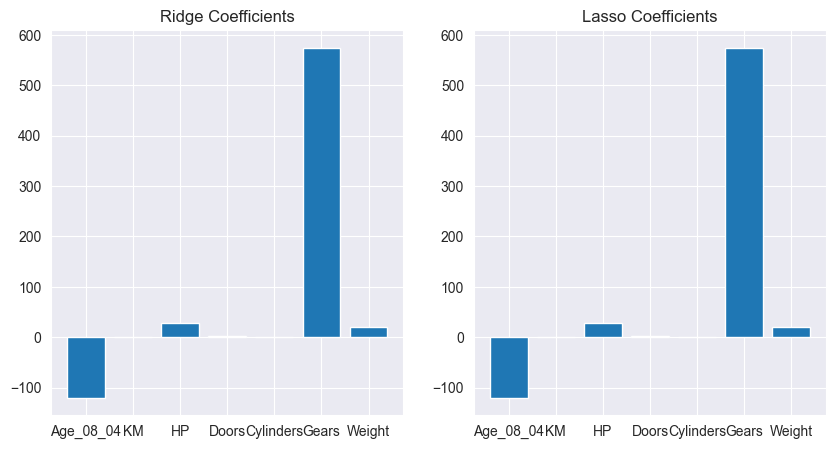

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x.columns, ridge_model.coef_)
plt.title("Ridge Coefficients")
plt.subplot(1, 2, 2)
plt.bar(x.columns, lasso_model.coef_)
plt.title("Lasso Coefficients")
plt.show()

# Interview Questions:
# 1.What is Normalization & Standardization and how is it helpful?

Normalization (Min-Max Scaling) scales data into a specific range (like [0, 1]). (e.g., neural networks, K-nearest neighbors).

Standardization (Z-Score Scaling) transforms the data to have a mean of 0 and a standard deviation of 1. (e.g., linear regression, SVM).

Both techniques help improve the performance of many machine learning algorithms by ensuring that features are on the same scale and contributing equally to the model.

# 2.What techniques can be used to address multicollinearity in multiple linear regression?

Remove highly correlated predictors.

Use PCA to reduce the number of features.

Apply Ridge or Lasso Regression to regularize the model.

Check the Variance Inflation Factor (VIF) and remove features with high VIFs.
